# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs (adjust the file paths as needed)
cast = pd.read_csv('data/cast.csv')
titles = pd.read_csv('data/titles.csv')
release_dates = pd.read_csv('data/release_dates.csv')


### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [124]:
#High level assessment
print("CAST:", cast.shape)
print(cast.dtypes)
print("\nTITLES:", titles.shape)
print(titles.dtypes)
print("\nRELEASE DATES:", release_dates.shape)
print(release_dates.dtypes)


CAST: (3442902, 6)
title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

TITLES: (226013, 2)
title    object
year      int64
dtype: object

RELEASE DATES: (443486, 4)
title      object
year        int64
country    object
date       object
dtype: object


### 2. How many movies have the title North by Northwest

In [126]:
titles[titles['title'] == 'North by Northwest'].shape[0]


1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [128]:
#Hamlet versions and years
hamlets = titles[titles['title'] == 'Hamlet']
print("Count:", hamlets.shape[0])
print("First:", hamlets['year'].min())
print("Last:", hamlets['year'].max())
hamlets


Count: 20
First: 1910
Last: 2017


,title,year
25028,Hamlet,2009
64116,Hamlet,1976
73929,Hamlet,1969
79939,Hamlet,1910
109822,Hamlet,2015
113670,Hamlet,1964
118331,Hamlet,2014
129673,Hamlet,1911
137240,Hamlet,2011
141682,Hamlet,2000


### 4. List all the movies called Treasure Island from oldest to newest

In [130]:
#All "Treasure Island" movies sorted by year
treasure_island = titles[titles['title'] == 'Treasure Island']
treasure_island.sort_values(by='year')


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [132]:
#Movies made in 1950, 1980, 2000
years = [1950, 1980, 2000]
titles[titles['year'].isin(years)].groupby('year').size()


year
1950    1109
1980    1750
2000    2568
dtype: int64

### 6. How big was the cast of Metropolis


In [134]:
#Get all Metropolis titles (could be remakes)
metropolis_titles = titles[titles['title'] == 'Metropolis']

#Merge with cast on title and year to find matching cast records
metropolis_cast = pd.merge(metropolis_titles[['title', 'year']], cast, on=['title', 'year'], how='inner')

#Display the number of roles
print("Total cast size for all 'Metropolis' movies:", metropolis_cast.shape[0])

#Optional: show cast sizes by year
metropolis_cast.groupby('year').size().sort_index()



Total cast size for all 'Metropolis' movies: 33


year
1927    33
dtype: int64

### 7. How many roles for actors were there 1950's? 1990's

In [142]:
#Roles in 1950s vs 1990s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960)]
roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]
print("1950s:", roles_1950s.shape[0])
print("1990s:", roles_1990s.shape[0])


1950s: 209890
1990s: 361218


### 8. How many roles for actors & actresses over time? Output should be a line graph

In [140]:
#Leading roles in the 2000s (assuming role_order == 1 is lead)
leading_roles = cast[(cast['year'].between(2000, 2009)) & (cast['n'] == 1)]
leading_roles.shape[0]


23593

### 9. How many "leading roles" were there in the 2000's?

In [138]:
#Leading roles in the 2000s (assuming role_order == 1 is lead)
leading_roles = cast[(cast['year'].between(2000, 2009)) & (cast['n'] == 1)]
leading_roles.shape[0]


23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [144]:
#Roles with no ranking in 2000s vs 1950s
unranked_2000s = cast[(cast['year'].between(2000, 2009)) & (cast['n'].isna())]
unranked_1950s = cast[(cast['year'].between(1950, 1959)) & (cast['n'].isna())]
print("2000s:", unranked_2000s.shape[0])
print("1950s:", unranked_1950s.shape[0])


2000s: 232037
1950s: 95406


### 11. Plot the number of films made in each decade

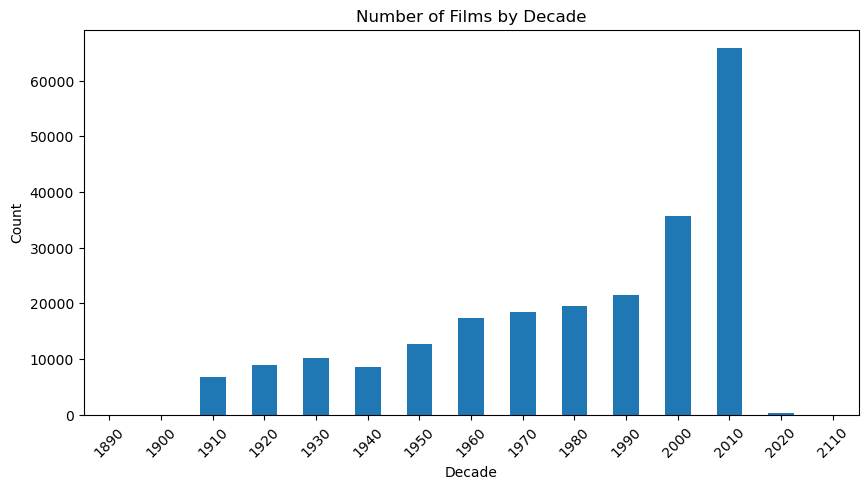

In [146]:
#Films made in each decade
titles['decade'] = (titles['year'] // 10) * 10
titles.groupby('decade').size().plot(kind='bar', figsize=(10, 5))
plt.title("Number of Films by Decade")
plt.ylabel("Count")
plt.xlabel("Decade")
plt.xticks(rotation=45)
plt.show()


### 12. Plot the number of films with a Rustler character over time

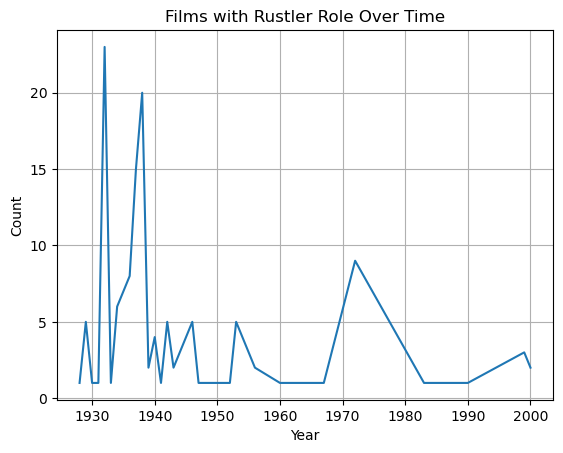

In [148]:
#Films with Rustler character over time
rustler_roles = cast[cast['character'] == 'Rustler']
rustler_roles.groupby('year').size().plot(kind='line')
plt.title("Films with Rustler Role Over Time")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid()
plt.show()


### 13. What are the top ten character names of all time?

In [150]:
#Top 10 character names of all time
cast['character'].value_counts().head(10)


character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [152]:
#Actor with most films in the 1990s
decade_90s = cast[(cast['year'].between(1990, 1999))]
decade_90s['name'].value_counts().head(1)


name
Shakti Kapoor    143
Name: count, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [154]:
#Top 10 roles starting with "Science"
cast[cast['character'].str.startswith('Science', na=False)]['character'].value_counts().head(10)


character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [156]:
#Film with the largest cast
cast.groupby(['title', 'year']).size().sort_values(ascending=False).head(1)


title                        year
Around the World in 80 Days  1956    1299
dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [158]:
#Descriptive stats for cast size
cast_counts = cast.groupby(['title', 'year']).size()
cast_counts.describe()


count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [160]:
#Films per year for Natalie Portman
natalie = cast[cast['name'] == 'Natalie Portman']
natalie.groupby('year').size()


year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [162]:
#Natalie Portman starring or co-starring (n = 1 or 2)
natalie_star = natalie[natalie['n'].isin([1, 2])]
natalie_star.groupby('year').size()


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

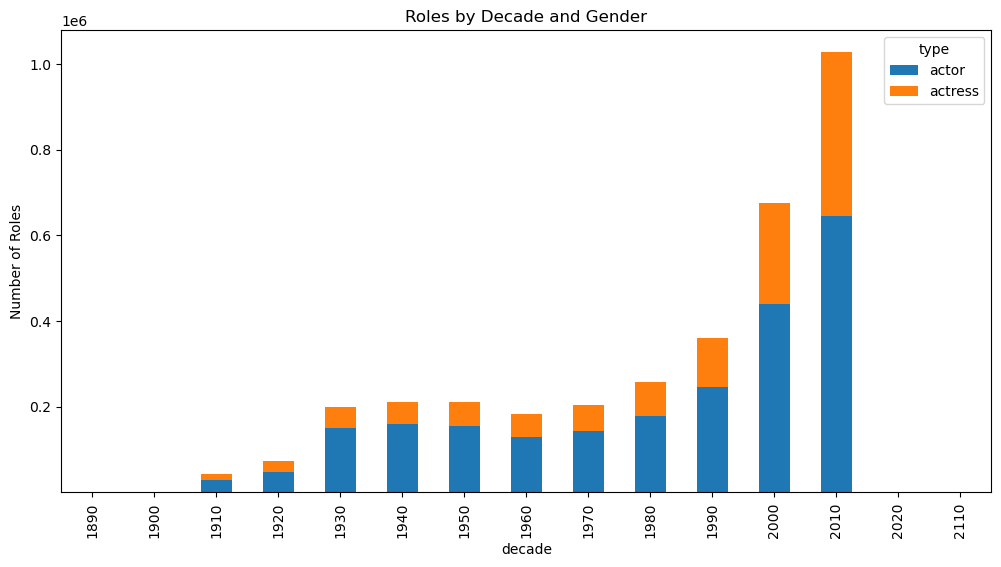

In [164]:
#Roles per decade by gender (plot)
cast['decade'] = (cast['year'] // 10) * 10
cast.groupby(['decade', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Roles by Decade and Gender")
plt.ylabel("Number of Roles")
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [166]:
#First, convert the 'date' column to datetime
release_dates['release_date'] = pd.to_datetime(release_dates['date'], errors='coerce')

#Extract weekday and month
release_dates['weekday'] = release_dates['release_date'].dt.day_name()
release_dates['month'] = release_dates['release_date'].dt.month

#Pivot table showing number of releases by weekday and month
pivot = release_dates.pivot_table(index='month', columns='weekday', aggfunc='size', fill_value=0)
pivot



weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,13734,3699,2925,1822,10746,1823,4663
2,13833,3138,2395,1277,10356,1190,4118
3,15268,3383,2742,1228,11844,1313,4479
4,13559,3168,2868,1358,10625,1446,4650
5,13198,3050,2270,1165,10100,1377,4289
6,11997,2337,2409,1031,9469,1179,4282
7,11635,2267,2291,894,8947,1144,4243
8,13430,2844,2277,1138,9931,1121,4270
9,14523,3161,2551,1332,10713,1309,4161


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

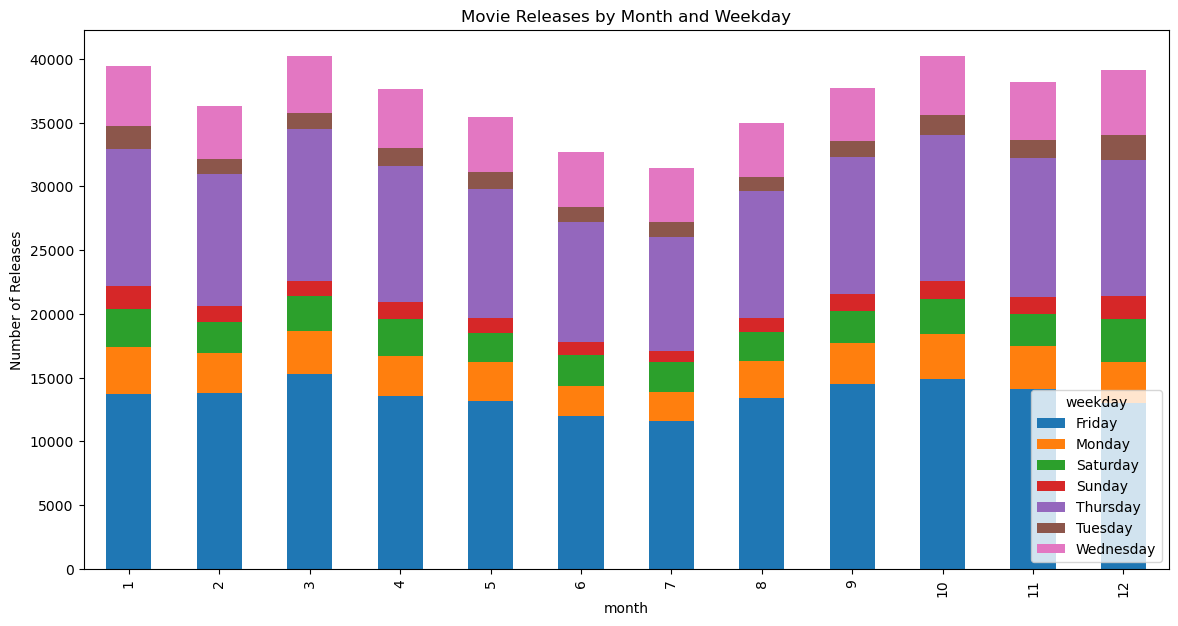

In [168]:
#Plotting the pivot table
pivot = release_dates.pivot_table(index='month', columns='weekday', aggfunc='size', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Movie Releases by Month and Weekday")
plt.ylabel("Number of Releases")
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [172]:
#Films Star Wars actor appeared in
# Step 1: get cast members from Star Wars
star_wars_cast = cast[cast['title'].str.contains('Star Wars', na=False)]
sw_actors = star_wars_cast['name'].unique()

#Step 2: Get other films those actors were in
other_films = cast[(cast['name'].isin(sw_actors)) & (~cast['title'].str.contains('Star Wars', na=False))]
other_films[['name', 'title', 'year']].drop_duplicates().sort_values(by='year')


,name,title,year
1902637,Sebastian Shaw,Caste,1930
1902649,Sebastian Shaw,Little Miss Nobody,1933
821960,Alec Guinness,Evensong,1934
1902641,Sebastian Shaw,Get Your Man,1934
1902658,Sebastian Shaw,The Way of Youth,1934
...,...,...,...
249920,Rony Bridges,Kingdom: Fall of Illandrieal,2019
2681415,Amira Ghazalla,The Rhythm Section,2019
684060,Harrison Ford,Untitled Indiana Jones Project,2020
2663224,Nika (III) Futterman,The Loud House,2020
